In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
from keras import layers,models


In [154]:
train_path = os.path.join("archive/flowers")
classes = os.listdir(train_path)

In [155]:
classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [10]:
count = 0
for clas in classes:
    count = count+len(os.listdir(train_path+"/"+clas))
print(count)

4326


In [160]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(
    rescale = 1./255.,
    horizontal_flip = True,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range=0.2,
)

train_data = train_gen.flow_from_directory(
    train_path, 
    target_size=(150, 150),
    batch_size = 64, 
    class_mode = "categorical" ,
    classes  = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'],
    shuffle = True,
)

Found 4323 images belonging to 5 classes.


(64, 150, 150, 3)


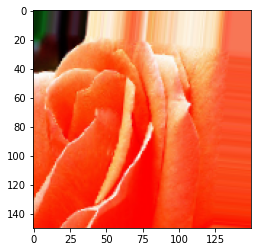

In [163]:
x, y = next(train_data)
print(x.shape)
plt.imshow(x[0])

In [164]:
y[0]

array([0., 0., 1., 0., 0.], dtype=float32)

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [69]:
model.compile(loss = "categorical_crossentropy", metrics = "acc", optimizer='adam')

In [71]:
history = model.fit(train_data, epochs = 5 )

Epoch 1/5
68/68 [==============================] - 154s 2s/step - loss: 0.9305 - acc: 0.6364
Epoch 2/5
68/68 [==============================] - 197s 3s/step - loss: 0.8978 - acc: 0.6498
Epoch 3/5
68/68 [==============================] - 174s 3s/step - loss: 0.8724 - acc: 0.6657
Epoch 4/5
68/68 [==============================] - 176s 3s/step - loss: 0.8593 - acc: 0.6664
Epoch 5/5
68/68 [==============================] - 155s 2s/step - loss: 0.8301 - acc: 0.6829


In [107]:
##get images for test. select 50 images from every set
##total of 50*5 = 250 images
from keras.preprocessing import image as Kimage
import random


y_test = np.zeros((250,5))
x_test = []

class_dict = {"daisy":0,"dandelion":1,"rose":2,"sunflower":3,"tulip":4}
for clas in classes:
    for i in range(50):
        images = os.listdir(train_path+"/"+clas)
        random_name = random.choice(images)
        img = Kimage.load_img(os.path.join(train_path+"/"+clas+"/"+random_name), target_size=(150, 150) )
        x_test.append(np.array(img))
        y_test[(class_dict[clas]*50)+i][class_dict[clas]] = 1
    
    
x_test = np.asarray(x_test)

<class 'list'>
*****


In [109]:

x_test.reshape(1,)

(250, 150, 150, 3)

In [110]:
x_test = x_test/255.

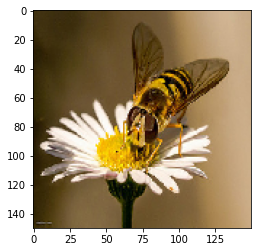

In [119]:
plt.imshow(x_test[0])

In [120]:
y_test[0]

array([1., 0., 0., 0., 0.])

In [115]:
res = model.predict_classes(x_test)

c:\users\nmiryala\appdata\local\programs\python\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [123]:
model.evaluate(x_test,y_test,batch_size = 1)

250/250 [==============================] - 10s 41ms/step - loss: 0.8258 - acc: 0.6760


[0.8258233666419983, 0.6759999990463257]

In [139]:
#get the flowers with most accurate

actual = np.argmax(y_test, axis = -1)

In [147]:
pred= {0:0,1:0,2:0,3:0}

In [152]:
pred[3]

49

In [149]:
for i,j in zip(actual,res):
    if i == j:
        pred[i] = pred[i]+1

KeyError: 4

In [153]:
pred

{0: 28, 1: 41, 2: 26, 3: 49}